# 모두의 딥러닝 개정 3판 
## 18장 시퀀스 배열로 다루는 순환 신경망(RNN)

**<참고> https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr**   

x 단어
t 시간
A 인공지능
h 출력값

최초 t=0
1단계 LSTM의 첫 단계로는 cell state로부터 어떤 정보를 버릴 것인지를 정하는 것으로, sigmoid layer에 의해 결정된다. (행렬곱 실시)   
2단계 forget gate layer
3단계 input gate layer   

keras에서 LSTM 제공해줌

#다중분류


In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# 학습셋, 테스트셋 분류
(X_train, y_train), (X_test, y_test) = \
reuters.load_data(num_words=1000, test_split=0.2)
# num_words=1000 :
# 단어별 토크나이징 후 이미 숫자화시킨 데이터 중 빈도 수 상위 999번까지 갖고와라(총 999개 존재)

In [3]:
# target(카테고리) 46개
print(np.max(y_train) + 1)

# 기사 갯수 확인
print(len(X_train))
print(len(X_test))

# 기사 이미 숫자화 완료
print(X_train[0])

46
8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
# 길이가 다른 기사 내 단어들 맞추기 pad_sequences
# maxlen=100은 단어 수를 100개로 맞추라는 의미, 그 이사이면 버림
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [5]:
print(y_train[:5])

[3 4 3 4 4]


In [6]:
# one-hot encoding (데이터 전처리)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# one-hot encoding 확인
print(y_train[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
# 모델 만들기
model = models.Sequential()
model.add(layers.Embedding(1000, 100))  # Embedding('불러온 단어의 총수'+1, 100차원으로 만들어라) 
model.add(layers.LSTM(100, activation='tanh')) # LSTM(기사당 단어 수, 옵션)
model.add(layers.Dense(46, activation='softmax'))

In [9]:
model. summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


* embedding(1000, 100)   
파라미터 = input * output = 1000 * 100
***
* LSTM 100   
  W.shqpe = input * output  ==> (100 + 100) * 100   
  B.shqpe = 1 * output      ==> 100

  input = 100 + 100 (pre 셀 출력 + this 셀 입력)   
  output = 100

  1개의 신경망 파라미터 = (100 + 100) * 100 + 100 = 20100   
  4개의 신경망 파라미터 = 20100 * 4 = 80400
***
* Dense 46   
  input 100   
  weight 100 * 46   
  bias 1 * 46   
  output 46   
  파라미터 = (100 * 46) + (1 * 46) = 4646

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [11]:
# 모델 실행(학습시키기)
history = model.fit(X_train, y_train, batch_size=20, epochs=20,
                   validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
450/450 [==============================] - 20s 37ms/step - loss: 2.1806 - accuracy: 0.4502 - val_loss: 2.0043 - val_accuracy: 0.4960
Epoch 2/20
450/450 [==============================] - 16s 36ms/step - loss: 1.8777 - accuracy: 0.5185 - val_loss: 1.8014 - val_accuracy: 0.5445
Epoch 3/20
450/450 [==============================] - 19s 43ms/step - loss: 1.7191 - accuracy: 0.5538 - val_loss: 1.7489 - val_accuracy: 0.5463
Epoch 4/20
450/450 [==============================] - 16s 37ms/step - loss: 1.5709 - accuracy: 0.5910 - val_loss: 1.5188 - val_accuracy: 0.6162
Epoch 5/20
450/450 [==============================] - 17s 38ms/step - loss: 1.4666 - accuracy: 0.6269 - val_loss: 1.4713 - val_accuracy: 0.6224
Epoch 6/20
450/450 [==============================] - 17s 38ms/step - loss: 1.3174 - accuracy: 0.6614 - val_loss: 1.3597 - val_accuracy: 0.6576
Epoch 7/20
450/450 [==============================] - 16s 36ms/step - loss: 1.2126 - accuracy: 0.6928 - val_loss: 1.3325 - val_accuracy:

In [12]:
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 11ms/step - loss: 1.2256 - accuracy: 0.7266
Test Accuracy: 0.7266


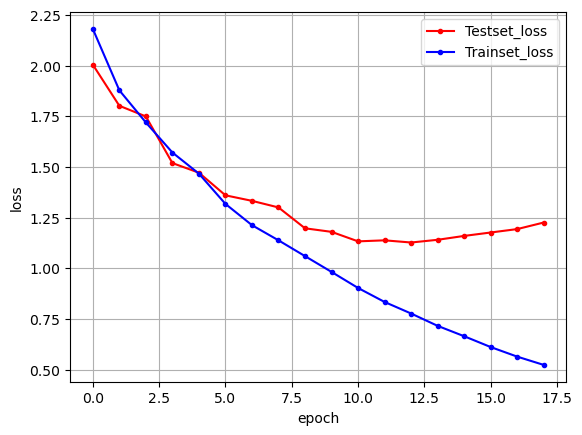

In [13]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# epoch 10~11 사이가 적당, 그 이후는 과대적합 우려있음